In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import torch
from torch import nn
import torch.optim as optim
from sklearn.preprocessing import MinMaxScaler

In [2]:
train_df = pd.read_excel('Mining-Data.xlsx', sheet_name='My_Training_Data70')
test_df = pd.read_excel('Mining-Data.xlsx', sheet_name='Testing_30')


X_train = train_df.drop('Recovery(%)', axis=1)
y_train = train_df[['Recovery(%)']]
X_test = test_df.drop('Recovery(%)', axis = 1)
y_test = test_df[['Recovery(%)']]

scaler_X = MinMaxScaler()
scaler_Y = MinMaxScaler()
X_train_normalized = scaler_X.fit_transform(X_train)
X_test_normalized = scaler_X.transform(X_test)


y_train_normalized = scaler_Y.fit_transform(y_train)
y_test_normalized = scaler_Y.transform(y_test)


X_train_tensor = torch.tensor(X_train_normalized, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test_normalized, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train_normalized, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test_normalized, dtype=torch.float32)

In [3]:
# Define your neural network model
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size1, hidden_size2, output_size):
        super(NeuralNet, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size1)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size1, hidden_size2)
        self.fc2 = nn.Linear(hidden_size1, hidden_size2)
        self.fc3 = nn.Linear(hidden_size2, output_size)
        

    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        out = self.relu(out)
        out = self.fc3(out)
        return out


# Initialize the model
input_size = X_train_tensor.shape[1]
hidden_size = 64
output_size = 1

model = NeuralNet(input_size, hidden_size, hidden_size, output_size)

In [4]:
model

NeuralNet(
  (fc1): Linear(in_features=9, out_features=64, bias=True)
  (relu): ReLU()
  (fc2): Linear(in_features=64, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=1, bias=True)
)

In [5]:
# Define the loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.001)

# Training loop
num_epochs = 1000
for epoch in range(num_epochs):
    # Forward pass
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)

    # Backward and optimize
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Print the loss for each epoch
    print(f'Epoch {epoch+1}/{num_epochs}, Loss: {loss.item()}')

Epoch 1/1000, Loss: 0.5332867503166199
Epoch 2/1000, Loss: 0.5291996598243713
Epoch 3/1000, Loss: 0.525148868560791
Epoch 4/1000, Loss: 0.5211341977119446
Epoch 5/1000, Loss: 0.5171530246734619
Epoch 6/1000, Loss: 0.513206958770752
Epoch 7/1000, Loss: 0.5092973709106445
Epoch 8/1000, Loss: 0.5054213404655457
Epoch 9/1000, Loss: 0.5015786290168762
Epoch 10/1000, Loss: 0.4977685511112213
Epoch 11/1000, Loss: 0.4939907491207123
Epoch 12/1000, Loss: 0.4902442991733551
Epoch 13/1000, Loss: 0.48652976751327515
Epoch 14/1000, Loss: 0.48284655809402466
Epoch 15/1000, Loss: 0.47919440269470215
Epoch 16/1000, Loss: 0.4755729138851166
Epoch 17/1000, Loss: 0.47198233008384705
Epoch 18/1000, Loss: 0.46842288970947266
Epoch 19/1000, Loss: 0.4648924469947815
Epoch 20/1000, Loss: 0.46139153838157654
Epoch 21/1000, Loss: 0.4579195976257324
Epoch 22/1000, Loss: 0.4544767439365387
Epoch 23/1000, Loss: 0.4510621428489685
Epoch 24/1000, Loss: 0.4476771652698517
Epoch 25/1000, Loss: 0.444320946931839
Epoch 

In [6]:
# Make predictions on the test data
with torch.no_grad():
    predicted_scaled = model(X_test_tensor)

In [7]:
predicted_unscaled = scaler_Y.inverse_transform(predicted_scaled)

In [8]:
compare_df = pd.DataFrame(predicted_unscaled, columns=['predicted'])
compare_df['actual'] = y_test.values

In [9]:
compare_df.head(10)

,predicted,actual
0,90.003905,89.959033
1,90.330279,90.590392
2,90.098868,88.761667
3,90.360659,90.777612
4,89.997147,90.116769
5,90.305350,90.428091
6,90.180675,91.709526
7,89.800583,89.376526
8,89.927086,90.828132
9,90.146749,90.003263


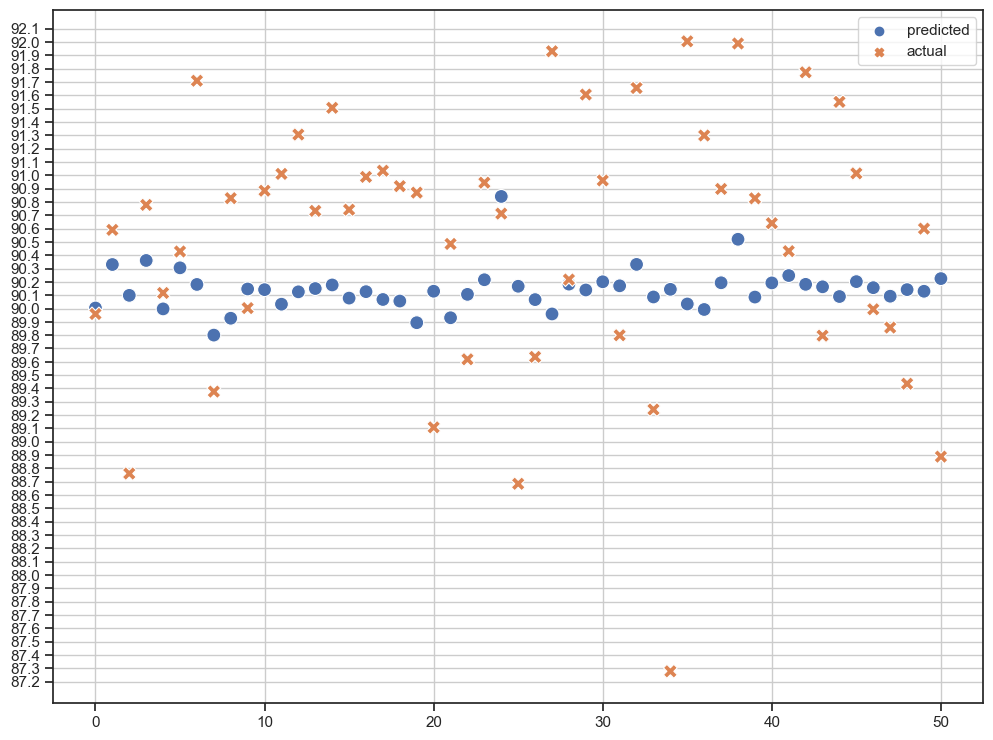

In [22]:
plt.figure(figsize=(12,9))
# sns.set(style='ticks')
# sns.scatterplot(compare_df)

sns.set(style="ticks")
sns.scatterplot(data=compare_df, s=100)


# x_ticks = np.arange(0, 50, 0.5)  # Adjust the range and step size as per your data
# plt.xticks(x_ticks)

y_ticks = np.arange(87.2, 92.2, 0.1)  # Adjust the range and step size as per your data
plt.yticks(y_ticks)
plt.grid()